### Vi prøver igen ...

- Alle data i en fil, vi korter i koden
- vi prøver med texts_to_matrix

### Konklusion
- Det er lykkedes at få det til at virke med een datafil, som indeholder både train og test

In [1]:
# vi sætter stien til data
import os
import pandas as pd
import numpy as np
os.chdir('/Users/ThomasGordon/Documents/PythonScripts/FED')

In [2]:
# Excel-filen med tekster åbnes og indlæses
xl = pd.ExcelFile('FEDAll.xlsx')
df = xl.parse('FEDlinjer')    # siden i arket
texts  = df.loc[:,'FEDtext']
texts  = texts.values
labels = df.loc[:,'FEDsize']
labels = labels.values

# vi rafler data rundt tilfældigt (vi laver et tilfældigt index)
indices = np.arange(texts.shape[0])
np.random.shuffle(indices)
texts   = texts[indices]
labels = labels[indices]

# opdeling i training data og test data
i = 90000  # antal linjer afsat til træning, resten er test
texts_train  = texts[:i]
texts_test   = texts[i:] 
labels_train = labels[:i]
labels_test  = labels[i:]

In [3]:
# laver tekst om til vektor, henter text processing modul

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 10000  # Vi ser kun på de 10.000 mest almindelige ord

# vi laver ordene i FED om til tilsvarende tal (som nedenfor laves til en "one-hot")
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

C:\Users\ThomasGordon\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# sætninger laves om til en "one hot" data vektor
# tester ...
data_train = tokenizer.texts_to_matrix(texts_train, mode='binary')
data_test  = tokenizer.texts_to_matrix(texts_test,  mode='binary')

# labels laves til vektor
labels_train = np.asarray(labels_train).astype('float32')
labels_test = np.asarray(labels_test).astype('float32')

# print størrelsen på train og test data
print(data_train.shape)
print(data_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(90000, 10000)
(10867, 10000)
(90000,)
(10867,)


In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
NumEpochs = 10
history = model.fit(data_train, labels_train,
                    epochs=NumEpochs,
                    batch_size=512,
                    validation_split=0.1)

Train on 81000 samples, validate on 9000 samples
Epoch 1/10
81000/81000 [==============================] - 17s 214us/step - loss: 0.2724 - acc: 0.9606 - val_loss: 0.1395 - val_acc: 0.9653
Epoch 2/10
81000/81000 [==============================] - 15s 181us/step - loss: 0.1493 - acc: 0.9625 - val_loss: 0.1253 - val_acc: 0.9653
Epoch 3/10
81000/81000 [==============================] - 16s 194us/step - loss: 0.1383 - acc: 0.9635 - val_loss: 0.1258 - val_acc: 0.9657
Epoch 4/10
81000/81000 [==============================] - 18s 219us/step - loss: 0.1337 - acc: 0.9641 - val_loss: 0.1273 - val_acc: 0.9660
Epoch 5/10
81000/81000 [==============================] - 16s 198us/step - loss: 0.1306 - acc: 0.9646 - val_loss: 0.1274 - val_acc: 0.9666
Epoch 6/10
81000/81000 [==============================] - 17s 206us/step - loss: 0.1269 - acc: 0.9650 - val_loss: 0.1284 - val_acc: 0.9657
Epoch 7/10
81000/81000 [==============================] - 17s 215us/step - loss: 0.1249 - acc: 0.9660 - val_loss: 0.1

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [ ]:
import matplotlib.pyplot as plt
plt.show()

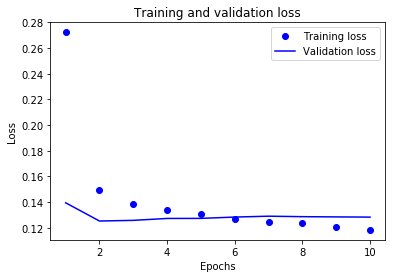

In [11]:
# plotter historikken for 'loss' og 'accuracy'
accu = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, NumEpochs+1)

plt.plot(epochs, loss, 'bo', label='Training loss')       # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

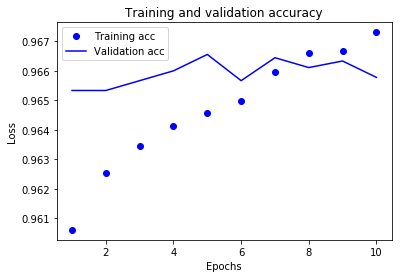

In [12]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Validering af modellen på test data
Her indlæser vi så test data, helt nye data til test

In [13]:
# vi prøver modellen på test-data

predictions = model.predict(data_test)

for i in range(1,10):
    print(('%1.4f' % predictions[i]))

0.0340
0.0000
0.0002
0.0201
0.0020
0.0735
0.0514
0.0133
0.0146


In [14]:
# finder ud af hvor stor en del store, som er fundet

print('Antal store i datasættet:    ', sum(labels_test))
NumEstimated = 0
for i in range(1,6000):
    if predictions[i]>0.1 and labels_test[i]:
        NumEstimated += 1
print('antal estimeret af modellen: ', NumEstimated)
print('Modellens præcision:         ', round(NumEstimated/sum(labels_test)*100), '%')

Antal store i datasættet:     442.0
antal estimeret af modellen:  117
Modellens præcision:          26.0 %


In [15]:
# Gennemsnittet for rigtig og forkert

print(' Gennemsnit for test stor og lille')
print(np.average([x for i, x in enumerate(predictions) if labels_test[i]]))
print(np.average([x for i, x in enumerate(predictions) if not labels_test[i]]))

 Gennemsnit for test stor og lille
0.18146855
0.031791665


In [16]:
# jeg prøver at printe linjenummer, prediction og tekststreng for dem som er store = "rigtige"

print('Jeg printer nogle liner som er sande i test data:')
for i in range(1,300):
    if labels_test[i]==1:
        PrtStr = ('%4.0f' % i) + '  ' + ('%1.4f' % predictions[i]) + '  ' + texts_test[i][:100].replace('\n', ' ').replace('\r', '')
        print(PrtStr) 

Jeg printer nogle liner som er sande i test data:
   2  0.0000  Der er stor mangel på ER til  mogentrafikkken. Der disponeres således :  4117-4116-4131-4132-414
   9  0.0146  Vi mangler en hulens masse MQ'er i FA/OD.
  21  0.0026  Fokustog
  34  0.3928  der mangler 2 me til morgen trafikken
  54  0.0097  materieldisponering
  58  0.0027  K -30 Sd. Kun til Ar. Vi fik ikke indsat rettidigt (skrevet kl. 15.01). Forsinkelser grundet nedreve
  66  0.0835  Mgl IC4 til morgen trafikken mandag i FA og OD
 123  0.0269  Materielfejl, holder nu koblet i Ringsted med fejl, kan ikke få traktion på toget.
 134  0.0182  Nedbrudt Høs.. Togsættet er tørkørt..
 157  0.0021  Disponering DSB : Vk hgl får ikke nok ER klar til eftermiddags trafikken
 165  0.1329  Nedformeringer ET
 189  0.0012  Materielfejl MF efter Ng, røgudvikling på toilet, der er helt sort, så kører retur til Ng og brandvæ
 209  0.3205  Falskbesættelses i NI
 228  0.6852  Ky. Skinnebrud. Flyttet fra kl. 11.50
 257  0.0000  Medgives to a

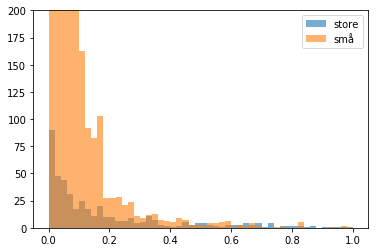

In [17]:
# jeg prøver lige at plotte "predictions i et histogram

# hent data for store og små i to arrays, lav til et np array, så plotteren kan forstå data
PlotDataSand = [x for i, x in enumerate(predictions) if labels_test[i]]
PlotDataSand = np.array(PlotDataSand)
PlotDataFalsk = [x for i, x in enumerate(predictions) if not labels_test[i]]
PlotDataFalsk = np.array(PlotDataFalsk)

plt.clf()  # clear figure
plt.hist(PlotDataSand, bins=50, alpha=0.6, label='store')  # 50 bins, halv hennemsigtig
plt.hist(PlotDataFalsk, bins=50, alpha=0.6, label='små')
plt.legend(loc='upper right')
plt.ylim([0, 200])

plt.show()

UHA UHA, alt for mange af de sande har en værdi tæt på 0 ...

### Modellen er ikke specielt præcis. jeg checker lige efter på træninsdata, dem kan man håbe den har lært bedre at kende???

In [18]:
# vi prøver modellen på test-data

predictions = model.predict(data_train)

# print de første predictions
for i in range(1,10):
    print(('%1.4f' % predictions[i]))

0.1040
0.0026
0.0013
0.0281
0.0587
0.0008
0.0005
0.0013
0.0017


In [19]:
# finder ud af hvor stor en del store, som er fundet

print('Antal store i datasættet:    ', sum(labels_train))
NumEstimated = 0
for i in range(1,len(labels_train)):
    if predictions[i]>0.4 and labels_train[i]:
        NumEstimated += 1
print('antal estimeret af modellen: ', NumEstimated)
print('Modellens præcision:         ', round(NumEstimated/sum(labels_train)*100), '%')

Antal store i datasættet:     3351.0
antal estimeret af modellen:  973
Modellens præcision:          29.0 %


In [20]:
# jeg prøver at printe linjenummer, prediction og tekststreng, som er RIGTIGE (store)

print('Nogle linjer som er SANDE i train data:')
for i in range(1,300):
    if labels_train[i]==1:
        PrtStr = ('%4.0f' % i) + '  ' + ('%1.4f' % predictions[i]) + '  ' + texts[i][:100].replace('\n', ' ').replace('\r', '')
        print(PrtStr) 

Nogle linjer som er SANDE i train data:
   1  0.1040  Materiel: Vi mangler 3 BR i Danmark
  31  0.0184  Afkobles som normalt i OD
 164  0.4613  Spærring Grenå banen forlønget 2 timer, til kl 17, så der er et par ændringer.
 169  0.0740  Materielfejl. Kan ikke køre
 175  0.3861  Vi mangler 3 ER på Kk til morgentrafikken. Det løser vi sådan her...
 183  0.0921  Disponering DSB. Det har ikke været muligt, at komme til/fra Askekassen i nat pga. den har været ube
 213  0.6051  En mulig fejl på køreledningen mellem MD og FA.
 221  0.0970  Vi mangler nogle MF-sæt, i forhold til hvad der er planlagt med i afg fra Ar..
 255  0.2271  Vi sætter ekstra vogne på følgende tog i aften:  Det skyldes, at vi forventer mange passagerer fra
 262  0.0466  15:05 Fanget i Flb, da fjernstyringen er gået ned.
 278  0.0247  Blokfejl NÆ - OL.


In [21]:
# jeg prøver at printe linjenummer, prediction og tekststreng, som er FORKERTE (små)

print('Nogle linjer som er FALSKE i train data:')
for i in range(1,200):
    if labels[i]==0:
        PrtStr = ('%4.0f' % i) + '  ' + ('%1.4f' % predictions[i]) + '  ' + texts[i][:100].replace('\n', ' ').replace('\r', '')
        print(PrtStr) 

Nogle linjer som er FALSKE i train data:
   2  0.0026  FOKUSTOG
   3  0.0013  Toget er lav på diesel, så vi aflyser rørløb og kører i Belv. for tankning.
   4  0.0281  Nedbrud fra tidliger i Sd er frigivet af hjælpevognen
   5  0.0587  Sporskiftefejl, rep af sporskifte i Ringsted.
   6  0.0008  Materielmangel MF : VK-IC3 AR får ikke et klar til L54
   7  0.0005  Stammeskift på KH, ET-sæt skal indsættes i s t f ER-sæt
   8  0.0013  Toilet stoppet
   9  0.0017  Test Byt på Hl
  10  0.0030  Disponering DSB : ET 4392 skal holde på UF kl.14:00
  11  0.0155  kørte sporskife op i NÆ
  12  0.0079  Løvfald: k-10 ud af Vn
  13  0.0003  ER-sættet skal til eftersyn på Hgl (overkørt)
  14  0.0170  Ingen kontrol over sporskifterne ind til Kac.
  15  0.0027  IC4      Køres idag med en MR, pga nedbrud på IC4 Matt.
  16  0.0005  Brudt plomb. Fortsætter til Hg med 70 km/t
  17  0.0956  DB.   Signalfejl ved Oldenburg.
  18  0.0734  Manglende materiel  56861 56869
  19  0.0001  Materiel  er oprangeret omv

In [22]:
# finder gennemsnittet for dem som er rigtige og forkerte

print(' Gennemsnit for ttrain stor og lille')
print(np.average([x for i, x in enumerate(predictions) if labels[i]]))
print(np.average([x for i, x in enumerate(predictions) if not labels[i]]))

 Gennemsnit for ttrain stor og lille
0.27190948
0.029051185


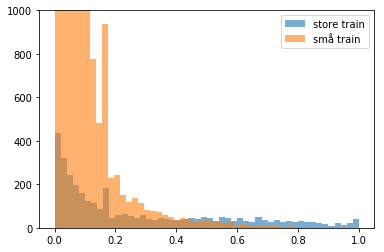

In [23]:
# jeg prøver lige at plotte "predictions i et histogram

# hent data for store og små i to arrays, lav til et np array, så plotteren kan forstå data
PlotDataSand = [x for i, x in enumerate(predictions) if labels_train[i]]
PlotDataSand = np.array(PlotDataSand)
PlotDataFalsk = [x for i, x in enumerate(predictions) if not labels_train[i]]
PlotDataFalsk = np.array(PlotDataFalsk)

plt.clf()  # clear figure
plt.hist(PlotDataSand, bins=50, alpha=0.6, label='store train')  # 50 bins, halv hennemsigtig
plt.hist(PlotDataFalsk, bins=50, alpha=0.6, label='små train')
plt.legend(loc='upper right')
plt.ylim([0, 1000])

plt.show()